<a href="https://colab.research.google.com/github/Vaishnavi-T-G/Sales_Data/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [188]:
import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_column',None)

In [189]:
Store_data = pd.read_excel("/content/sample_data/Online-Store-Orders.xlsx")
Store = Store_data.copy()
Store.to_csv('Store.csv', index =False)

In [190]:
Store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   OrderID          1200 non-null   object        
 1   Date             1200 non-null   datetime64[ns]
 2   CustomerID       1200 non-null   object        
 3   Product          1200 non-null   object        
 4   Quantity         1200 non-null   int64         
 5   UnitPrice        1200 non-null   float64       
 6   ShippingAddress  1200 non-null   object        
 7   PaymentMethod    1200 non-null   object        
 8   OrderStatus      1200 non-null   object        
 9   TrackingNumber   1200 non-null   object        
 10  ItemsInCart      1200 non-null   int64         
 11  CouponCode       891 non-null    object        
 12  ReferralSource   1200 non-null   object        
 13  TotalPrice       1200 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(

In [191]:
Store.describe()

,Date,Quantity,UnitPrice,ItemsInCart,TotalPrice
count,1200,1200.000000,1200.000000,1200.000000,1200.000000
mean,2024-03-22 16:58:48,2.945833,356.412750,5.485000,1053.968300
min,2023-01-01 00:00:00,1.000000,11.390000,1.000000,11.390000
25%,2023-08-03 18:00:00,2.000000,186.062500,4.000000,410.520000
50%,2024-03-23 00:00:00,3.000000,364.210000,5.000000,823.615000
75%,2024-11-08 12:00:00,4.000000,521.570000,7.000000,1578.475000
max,2025-06-30 00:00:00,5.000000,699.930000,10.000000,3456.400000
std,NaN,1.407557,197.177146,2.281983,819.856558


In [192]:
Store.head(5)

,OrderID,Date,CustomerID,Product,Quantity,UnitPrice,ShippingAddress,PaymentMethod,OrderStatus,TrackingNumber,ItemsInCart,CouponCode,ReferralSource,TotalPrice
0,ORD200000,2023-01-04,C72649,Monitor,5,570.62,928 Main St,Debit Card,Shipped,TRK37947903,7,SAVE10,Instagram,2853.10
1,ORD200001,2024-08-23,C75739,Phone,2,151.35,823 Main St,Online,Shipped,TRK91186779,3,SAVE10,Referral,302.70
2,ORD200002,2024-02-27,C81728,Tablet,5,550.68,512 Main St,Credit Card,Cancelled,TRK42903982,8,FREESHIP,Email,2753.40
3,ORD200003,2023-10-15,C33540,Chair,1,273.19,275 Main St,Debit Card,Returned,TRK62788070,5,SAVE10,Facebook,273.19
4,ORD200004,2025-05-08,C81840,Printer,4,626.01,668 Main St,Online,Delivered,TRK29241424,8,SAVE10,Email,2504.04


In [193]:

Store.sample()


,OrderID,Date,CustomerID,Product,Quantity,UnitPrice,ShippingAddress,PaymentMethod,OrderStatus,TrackingNumber,ItemsInCart,CouponCode,ReferralSource,TotalPrice
959,ORD200959,2024-04-13,C73996,Tablet,2,143.82,856 Main St,Credit Card,Returned,TRK74579570,6,SAVE10,Instagram,287.64


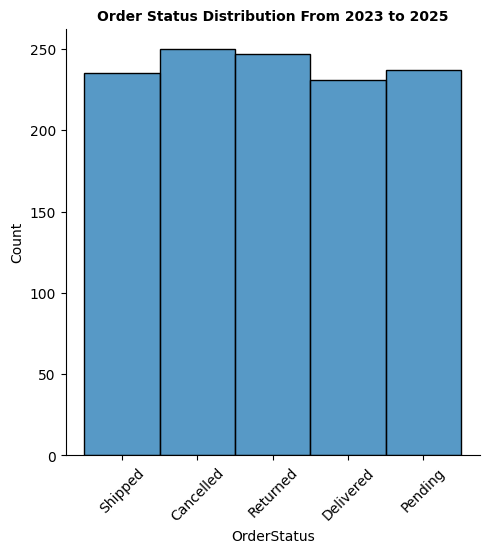

In [194]:

sns.displot(Store['OrderStatus'])
plt.title("Order Status Distribution From 2023 to 2025", fontsize = '10', fontweight ='bold', loc ='Center')
plt.xticks(rotation = 45)
plt.show()



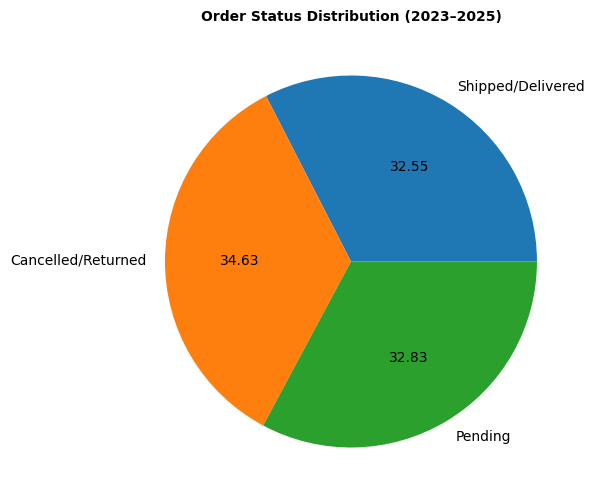

In [195]:
Store_Sale_23to25 = Store[Store['OrderStatus'].str.contains('Shipped','Delivered')]
Store_return_23to25 = Store[Store['OrderStatus'].str.contains('Cancelled','Returned')]
Store_pending_23to25 = Store[Store['OrderStatus'].str.contains('Pending')]
labels = ['Shipped/Delivered', 'Cancelled/Returned', 'Pending']
sizes = [len(Store_Sale_23to25), len(Store_return_23to25), len(Store_pending_23to25)]
# Plot pie chart
plt.figure(figsize=(6,7))
plt.pie(sizes, labels=labels, autopct='%0.2f')
plt.title('Order Status Distribution (2023–2025)',fontweight = 'bold', fontsize =10)
plt.show()


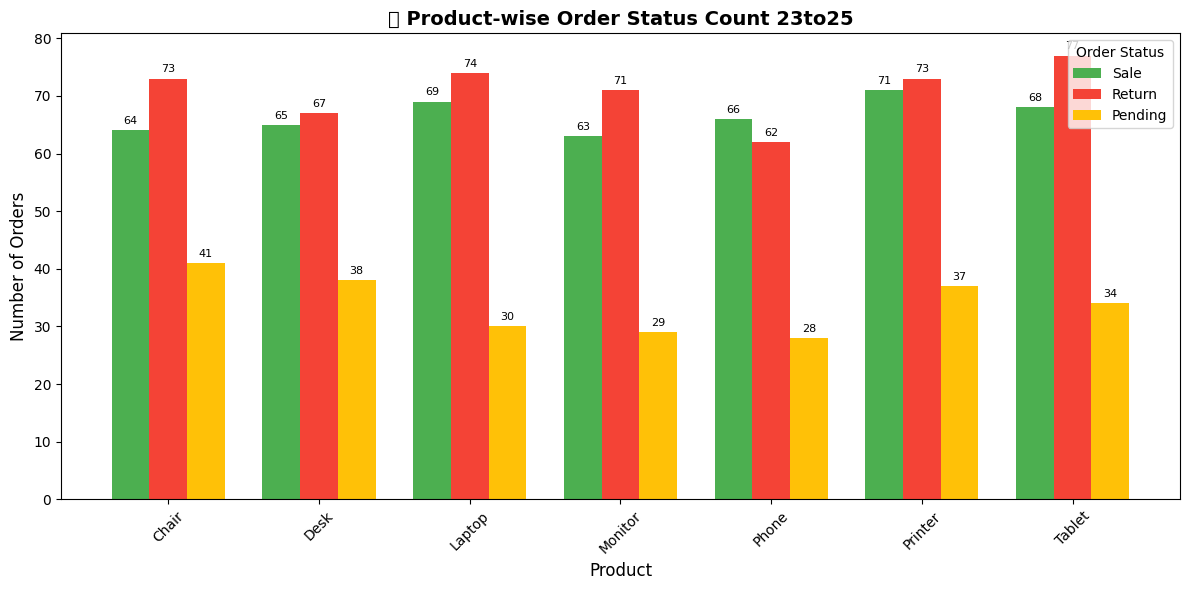

In [196]:
# Group and summarize
summary = Store.groupby(['Product', 'OrderStatus']).size().unstack(fill_value=0)
summary['Sale'] = summary.get('Shipped', 0) + summary.get('Delivered', 0)
summary['Return'] = summary.get('Cancelled', 0) + summary.get('Returned', 0)
summary['Pending'] = summary.get('Pending', 0)
summary = summary[['Sale', 'Return', 'Pending']]

# Setup
products = summary.index.tolist()
statuses = summary.columns.tolist()
x = np.arange(len(products))
width = 0.25
colors = ['#4CAF50', '#F44336', '#FFC107']  # Green, Red, Amber

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
for i, status in enumerate(statuses):
    bars = ax.bar(x + i * width, summary[status], width, label=status, color=colors[i])
    # Add labels
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{int(height)}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

# Format
ax.set_title('📦 Product-wise Order Status Count 23to25', fontweight='bold', fontsize=14)
ax.set_xlabel('Product', fontsize=12)
ax.set_ylabel('Number of Orders', fontsize=12)
ax.set_xticks(x + width)
ax.set_xticklabels(products, rotation=45)
ax.legend(title='Order Status')
plt.tight_layout()
plt.show()

In [197]:
Store['Date'] = pd.to_datetime(Store['Date'],format = '%y-%m-%d', errors = 'coerce')

In [198]:
Store['Date'].isnull().any()

np.False_

In [199]:
Store_2023 = Store[Store['Date'].dt.year== 2023]
Store_2024 = Store[Store['Date'].dt.year== 2024]
Store_2025 = Store[Store['Date'].dt.year== 2025]


In [200]:
Store_2023.head()
Store_2023.info()
Store_2023.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 0 to 1199
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   OrderID          510 non-null    object        
 1   Date             510 non-null    datetime64[ns]
 2   CustomerID       510 non-null    object        
 3   Product          510 non-null    object        
 4   Quantity         510 non-null    int64         
 5   UnitPrice        510 non-null    float64       
 6   ShippingAddress  510 non-null    object        
 7   PaymentMethod    510 non-null    object        
 8   OrderStatus      510 non-null    object        
 9   TrackingNumber   510 non-null    object        
 10  ItemsInCart      510 non-null    int64         
 11  CouponCode       377 non-null    object        
 12  ReferralSource   510 non-null    object        
 13  TotalPrice       510 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2), ob

,Date,Quantity,UnitPrice,ItemsInCart,TotalPrice
count,510,510.000000,510.000000,510.000000,510.000000
mean,2023-07-02 20:14:07.058823424,2.988235,358.676980,5.621569,1083.614196
min,2023-01-01 00:00:00,1.000000,11.390000,1.000000,11.390000
25%,2023-04-01 12:00:00,2.000000,184.105000,4.000000,410.645000
50%,2023-07-03 12:00:00,3.000000,373.045000,6.000000,859.330000
75%,2023-10-04 18:00:00,4.000000,517.450000,7.000000,1654.192500
max,2023-12-30 00:00:00,5.000000,697.500000,10.000000,3456.400000
std,NaN,1.404406,198.752994,2.253120,834.662821


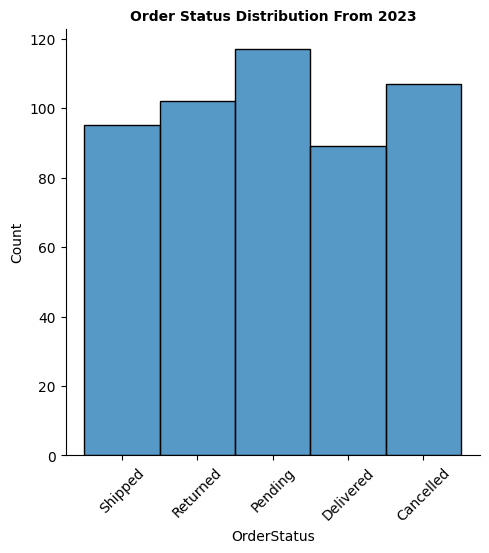

In [201]:
sns.displot(Store_2023['OrderStatus'])
plt.title("Order Status Distribution From 2023", fontsize = '10', fontweight ='bold', loc ='Center')
plt.xticks(rotation = 45)
plt.show()


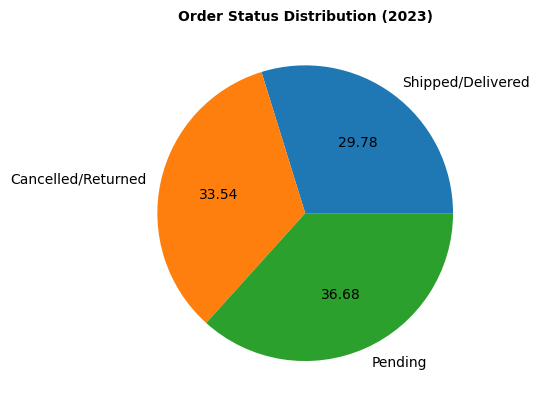

In [202]:
Store_sale_2023 = Store_2023[Store_2023['OrderStatus'].str.contains('Shipped','Delivered')]
Store_return_2023 = Store_2023[Store_2023['OrderStatus'].str.contains('Cancelled','Returned')]
Store_pending_2023 = Store_2023[Store_2023['OrderStatus'].str.contains('Pending')]
Size = len(Store_sale_2023), len(Store_return_2023), len(Store_pending_2023)
labels = ['Shipped/Delivered', 'Cancelled/Returned', 'Pending']
plt.pie(Size,labels=labels,autopct ='%0.2f')
plt.title('Order Status Distribution (2023)',fontweight = 'bold', fontsize =10)
plt.show()

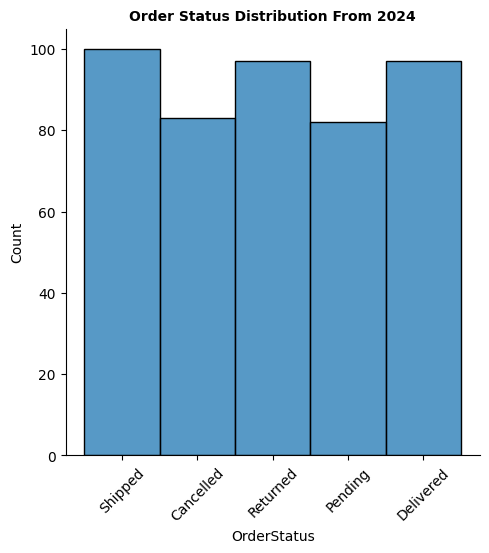

In [203]:
sns.displot(Store_2024['OrderStatus'])
plt.title("Order Status Distribution From 2024", fontsize = '10', fontweight ='bold', loc ='Center')
plt.xticks(rotation = 45)
plt.show()

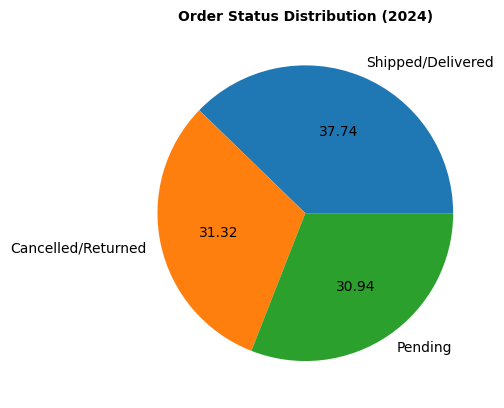

In [204]:
Store_sale_2024 = Store_2024[Store_2024['OrderStatus'].str.contains('Shipped','Delivered')]
Store_return_2024 = Store_2024[Store_2024['OrderStatus'].str.contains('Cancelled','Returned')]
Store_pending_2024 = Store_2024[Store_2024['OrderStatus'].str.contains('Pending')]
Size = len(Store_sale_2024), len(Store_return_2024), len(Store_pending_2024)
labels = ['Shipped/Delivered', 'Cancelled/Returned', 'Pending']
plt.pie(Size,labels=labels,autopct ='%0.2f')
plt.title('Order Status Distribution (2024)',fontweight = 'bold', fontsize =10)
plt.show()

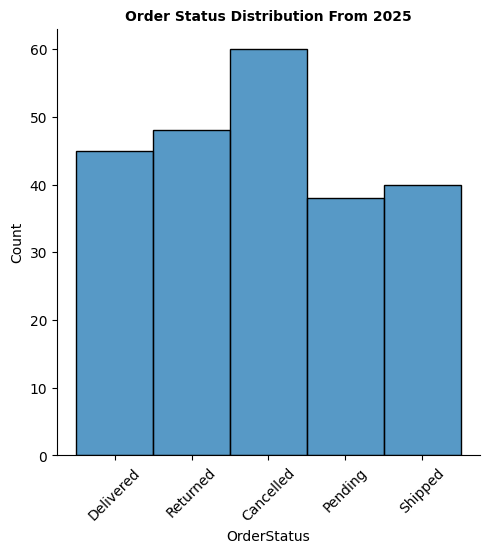

In [205]:
sns.displot(Store_2025['OrderStatus'])
plt.title("Order Status Distribution From 2025", fontsize = '10', fontweight ='bold', loc ='Center')
plt.xticks(rotation = 45)
plt.show()

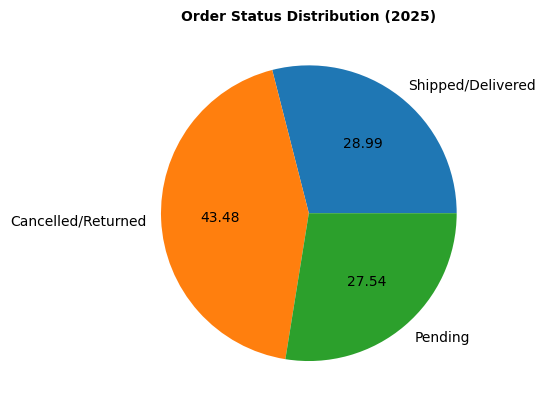

In [206]:
Store_sale_2025= Store_2025[Store_2025['OrderStatus'].str.contains('Shipped','Deilivered')]
Store_return_2025 = Store_2025[Store_2025['OrderStatus'].str.contains('Cancelled','Returned')]
Store_pending_2025 = Store_2025[Store_2025['OrderStatus'].str.contains('Pending')]
Size = len(Store_sale_2025), len(Store_return_2025), len(Store_pending_2025)
labels = ['Shipped/Delivered', 'Cancelled/Returned', 'Pending']
plt.pie(Size,labels=labels,autopct ='%0.2f')
plt.title('Order Status Distribution (2025)',fontweight = 'bold', fontsize =10)
plt.show()

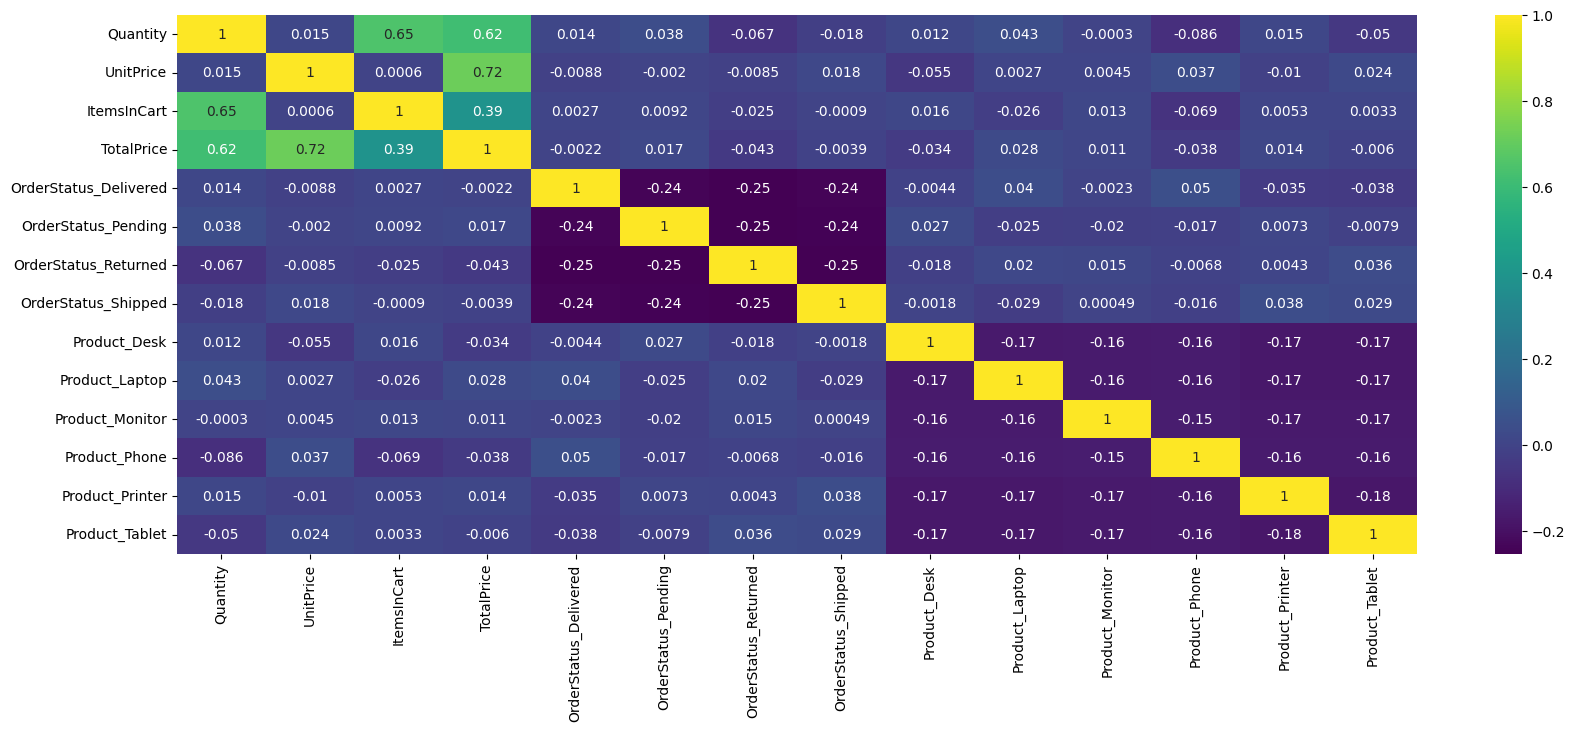

In [207]:
Store_data = Store.drop('OrderID', axis=1)
Store_data = Store_data.select_dtypes(include='number')
encoded_data = pd.get_dummies(Store[['OrderStatus', 'Product']], drop_first=True)
combined_data = pd.concat([Store_data, encoded_data], axis=1)
plt.figure(figsize =[20,7])
sns.heatmap(combined_data.corr(), annot=True, cmap='viridis')
plt.show()